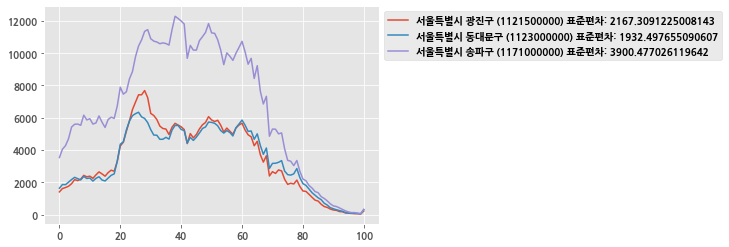

In [147]:
#실습

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("seoul_population.csv", header=0, index_col=0, thousands=',', encoding='cp949')
data_slice = data.iloc[1:,2:]
data_slice = data_slice.apply(pd.to_numeric)

age = []
for i in range(0, 101):
    age.append(i)
data_slice.columns = age

comp = []
for row in data_slice.T:
    comp.append(((data_slice.T[row] - data_slice.T["서울특별시 광진구 (1121500000)"])**2).sum())

data_slice["비교"] = comp
data_slice_sorted = data_slice.sort_values(by='비교' ,ascending=True)

plt.rcParams['font.family'] = 'NanumGothic'
plt.style.use('ggplot')

label1 = list(data_slice_sorted.T)[0] + ' 표준편차: ' + str(data_slice_sorted.iloc[0,:101].std())
label2 = list(data_slice_sorted.T)[1] + ' 표준편차: ' + str(data_slice_sorted.iloc[1,:101].std())
label3 = list(data_slice_sorted.T)[24] + ' 표준편차: ' + str(data_slice_sorted.iloc[24,:101].std())

plt.plot(data_slice_sorted.iloc[0,:101], label=label1)
plt.plot(data_slice_sorted.iloc[1,:101], label=label2)
plt.plot(data_slice_sorted.iloc[24,:101], label=label3)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

